# Random Variates

When we perform a fit or load and analysis result, the parmeters of our model become distributions in the AnalysisResults object. These are actaully instantiactions of the RandomVaraiates class. 

While we have covered most of the functionality of RandomVariates in the AnalysisResults section, we want to highlight a few of the details here.

In [1]:

from threeML import *

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
import matplotlib.pyplot as plt
plt.style.use("mike")


/Users/jburgess/coding/tml/threeml/threeML/__init__.py:12: UserWarning: No DISPLAY variable set. Using backend for graphics without display (Agg)
  warnings.warn("No DISPLAY variable set. Using backend for graphics without display (Agg)")
/Users/jburgess/coding/tml/astromodels/astromodels/functions/function.py:139: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  function_definition = my_yaml.load(dct['__doc__'])
/Users/jburgess/coding/tml/astromodels/astromodels/core/parameter.py:555: UserWarning: We have set the min_value of K to 1e-99 because there was a postive transform
  warnings.warn('We have set the min_value of %s to 1e-99 because there was a postive transform' % self.path)
/Users/jburgess/coding/tml/astromodels/astromodels/core/parameter.py:555: UserWarning: We have set the min_value of xc to 1e-99 because there was a postive transform
  warnings.warn('We have se

Configuration read from /Users/jburgess/.threeML/threeML_config.yml



WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

        Use astroquery.utils.timer.timefunc instead. [astropy.utils.timer]
        Use astroquery.utils.timer.timefunc instead.
        Use astroquery.utils.timer.timefunc instead. [astroquery.vo_conesearch.conesearch]
        Use astroquery.utils.timer.timefunc instead.

WARNING YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



Let's load back our fit of the line + gaussian from the AnalysisResults section.

In [2]:
ar = load_analysis_results('test_mle.fits')


WARNING YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



When we display our fit, we can see the **parameter paths** of the model. What if we want specific information on a parameter(s)?

In [3]:
ar.display()

Best fit values:



,result,unit
parameter,,
fake.spectrum.main.composite.a_1,(9 +/- 4) x 10^-3,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,1.76 +/- 0.11,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(3.2 +/- 0.4) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,(2.521 +/- 0.012) x 10,keV
fake.spectrum.main.composite.sigma_2,1.09 +/- 0.09,keV



Correlation matrix:



1.00,-0.85,0.00,-0.02,-0.00
-0.85,1.00,-0.05,0.02,-0.08
0.00,-0.05,1.00,-0.24,-0.15
-0.02,0.02,-0.24,1.00,-0.13
-0.00,-0.08,-0.15,-0.13,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
sim_data,24.81213
total,24.81213



Values of statistical measures:



,statistical measures
AIC,60.987896
BIC,69.184375


Let's take a look at the normalization of the gaussian. To access the parameter, we take the parameter path, and we want to get the variates:

In [4]:
norm = ar.get_variates('fake.spectrum.main.composite.F_2')

Now, norm is a RandomVariate.

In [5]:
type(norm)

threeML.random_variates.RandomVariates

This is essentially a wrapper around numpy NDArray with a few added properties. It is an array of samples. In the MLE case, they are samples from the covariance matrix (this is not at all a marginal distribution, but the parameter "knows" about the entire fit, i.e., it is *not* a profile) and in the Bayesian case, these are samples from the posterior (this is a marginal).

The output representation for an RV are its 68% equal-tail and HPD uncertainties.

In [6]:
norm

equal-tail: (3.2 +/- 0.4) x 10, hpd: (3.2 +/- 0.4) x 10

We can access these directly, and to any desired confidence level.

In [7]:
norm.equal_tail_interval(cl=0.95)

(24.422018993408035, 39.46392609276965)

In [8]:
norm.highest_posterior_density_interval(cl=0.5)

(29.611419389249594, 34.79257615745331)

As stated above, the RV is made from samples. We can histogram them to show this explicitly.

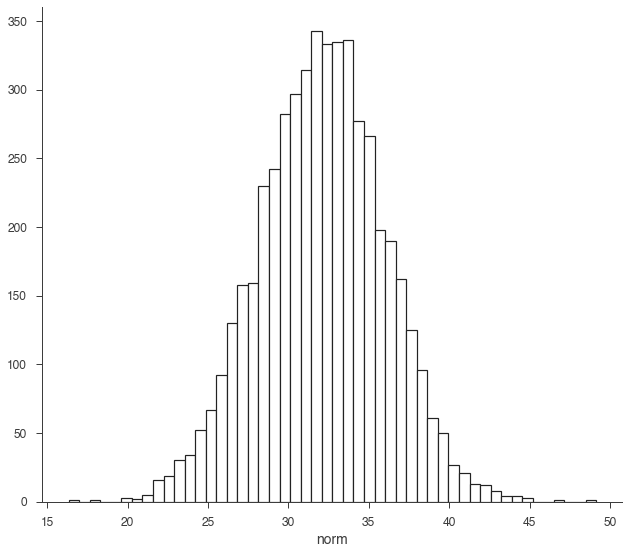

In [9]:
fig, ax = plt.subplots()

ax.hist(norm.samples,bins=50, ec='k', fc='w', lw=1.2);
ax.set_xlabel('norm');

We can easily transform the RV through propagation.

In [10]:
log_norm = np.log10(norm)
log_norm

equal-tail: 1.51 -0.06 +0.05, hpd: 1.51 +/- 0.05

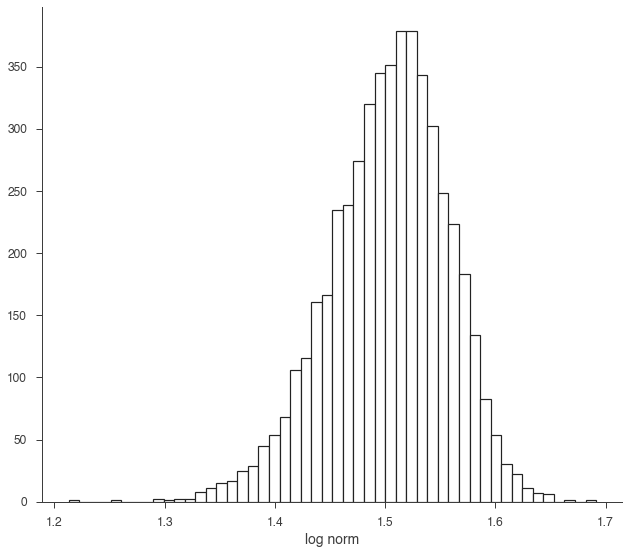

In [11]:
fig, ax = plt.subplots()

ax.hist(log_norm.samples,bins=50,ec='k', fc='w', lw=1.2);
ax.set_xlabel('log norm');